In [89]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [90]:
df=pd.read_csv('dataset.csv')

In [91]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [92]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [93]:
scale=StandardScaler()

In [94]:
X=df.iloc[:,:-1]

In [95]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [96]:
y=df['target']

In [97]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [98]:
X_scale=scale.fit_transform(X)

In [99]:
#y_scale=scale.transform(y)

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [101]:
X_train.shape

(212, 13)

In [102]:
X_test.shape

(91, 13)

In [103]:
y_train.shape

(212,)

In [104]:
y_test.shape

(91,)

In [105]:
random=RandomForestClassifier(n_estimators=100,max_depth=10)

In [106]:
random.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [107]:
y_pred=random.predict(X_test)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        50
           1       0.71      0.90      0.80        41

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91



In [109]:
importances = random.feature_importances_

In [110]:
sorted_indices = np.argsort(importances)[::-1]

In [111]:
top_features = sorted_indices[:5]

In [116]:
feature_names = [i for i in top_features]

In [117]:
feature_names

[2, 7, 11, 9, 4]

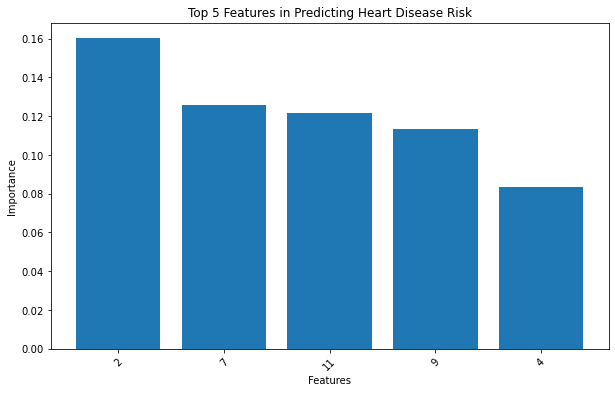

In [118]:
plt.figure(figsize=(10, 6))
plt.bar(range(5), importances[top_features])
plt.xticks(range(5), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Features in Predicting Heart Disease Risk')
plt.show()

In [119]:
##Hperparametre

In [120]:
from sklearn.model_selection import GridSearchCV

In [122]:
params={
    'max_depth':[3,5,10,None],
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy']
}

In [126]:
clf=GridSearchCV(random,param_grid=params,cv=5)

In [127]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [100, 200, 300]})

In [128]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}

In [129]:
y_pred_cv=clf.predict(X_test)

In [132]:
print(classification_report(y_pred_cv,y_test))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        39
           1       0.90      0.71      0.80        52

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.82      0.79      0.79        91

